<a href="https://colab.research.google.com/github/benitez-mjv/Research-and-Development/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ESTUDOS SOBRE A COVID-19

# Colaboradores
- Leandro Benitez
- Renato Rodrigues
- Thiago Brito
- Wallace Marcelo
- Bruno Gurgel
- Diego Queiroz
- Thiago Lechuga

# To Do

- No gráfico "Quantidade óbitos causados pela COVID-19 por dia no Brasil" plotar um gráfico sobreposto do tipo scatter com os números por dia
- Finalizar gráfico de calor sinalizando pontos com maiores casos por estado no Brasil
- Criar visualização para acompanhar a 'cura' da COVID-19 (cenário menos pessimista)
- Que outras métricas podemos criar visando um cenário menos problema / mais solução (positivista)
- Tratar UF lat-long

# Done

*'Mova as atividades do To Do para Done*
- Organizar o gráfico já existente em ordem ascendente por data
- Encontrar uma fonte de dados que tenha latitude e longitude
- Criar um dataframe sumarizado por data e estado
- Criar um join dos dataframes para poder plotar um mapa com as métricas

# Bibliotecas Python

In [0]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
import datetime
import folium

# Fontes de Dados

In [0]:
# Mapeando a fonte dos dados
urlBr = 'https://raw.githubusercontent.com/belisards/coronabr/master/dados/corona_brasil.csv'
urlMundo = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# Manipulação dos Dados

In [129]:
# Definindo o DataFrame
dfBrasil = pd.read_csv(urlBr, error_bad_lines=False)
dfBrasil.head(10)

dfMundo = pd.read_csv(urlMundo, error_bad_lines=False)
dfMundo.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,6,9,19,32,39,39
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,669,669,818,1029


In [130]:
# Group by Date and UF
dfBrasil_groupDate = dfBrasil.groupby(['date'],as_index=False).sum()
dfBrasil_groupUF = dfBrasil.groupby(['uf'],as_index=False).sum()
dfBrasil_groupDate.head()


,date,uid,suspects,refuses,confirmado,deads,cases,deaths
0,2020-01-30,248,9.0,6.0,0.0,0.0,0,0
1,2020-01-31,248,13.0,9.0,0.0,0.0,0,0
2,2020-02-01,248,16.0,10.0,0.0,0.0,0,0
3,2020-02-02,248,16.0,10.0,0.0,0.0,0,0
4,2020-02-03,248,14.0,13.0,0.0,0.0,0,0


In [131]:
# Ordenando por data em ordem ascendente
dfBrasilSorted = dfBrasil_groupDate.sort_values('date')
dfBrasilSorted.head()

,date,uid,suspects,refuses,confirmado,deads,cases,deaths
0,2020-01-30,248,9.0,6.0,0.0,0.0,0,0
1,2020-01-31,248,13.0,9.0,0.0,0.0,0,0
2,2020-02-01,248,16.0,10.0,0.0,0.0,0,0
3,2020-02-02,248,16.0,10.0,0.0,0.0,0,0
4,2020-02-03,248,14.0,13.0,0.0,0.0,0,0


# Base de mapas

Base de mapas pode ser usada abaixo. lat e long por cidade, lat e long por UF working progress.

In [0]:
#download do repo
! git clone https://github.com/kelvins/Municipios-Brasileiros.git

from google.colab import files
import io
import pandas as pd

#dataFrames
municipios = pd.read_csv('/content/Municipios-Brasileiros/csv/municipios.csv', error_bad_lines=False)
estados = pd.read_csv('/content/Municipios-Brasileiros/csv/estados.csv', error_bad_lines=False)

#merge entre os cvs's
cidades = pd.merge(estados, municipios, on=['codigo_uf', 'codigo_uf'])

#Work in Progres UF.
#d = {'UF': ["AC","AL","AP","AM","BA","CE","DF","ES","GO","MA","MT","MS","MG","PA","PB","PR","PE","PI","RJ","RN","RS","RO","RR","SC","SP","SE","TO"
#], 'nome': ["Rio Branco","Maceió","Macapá","Manaus","Salvador","Fortaleza","Brasília","Vitória","Goiânia","São Luís","Cuiabá","Campo Grande","Belo Horizonte","Belém","João Pessoa","Curitiba","Recife","Teresina","Rio de Janeiro","Natal","Porto Alegre","Porto Velho","Boa Vista","Florianópolis","São Paulo","Aracaju","Palmas"
#]}#
#setcapitais = pd.DataFrame(data=d)
#capitais = pd.merge(setcapitais, municipios, on=['nome', 'nome'])


fatal: destination path 'Municipios-Brasileiros' already exists and is not an empty directory.


In [0]:

# Cruzando base de casos com latitude e longitude das cidades
dfCordenadas = pd.merge(cidades, df, on=['uf','uf'])

# Filtrando somente coordenadas com quantidade de casos de COVID-19 maiores que zero
dfCordenadasCases = dfCordenadas.loc[dfCordenadas['cases']>0]



# Estudos

## Evolução de óbitos por data no Brasil

No handles with labels found to put in legend.


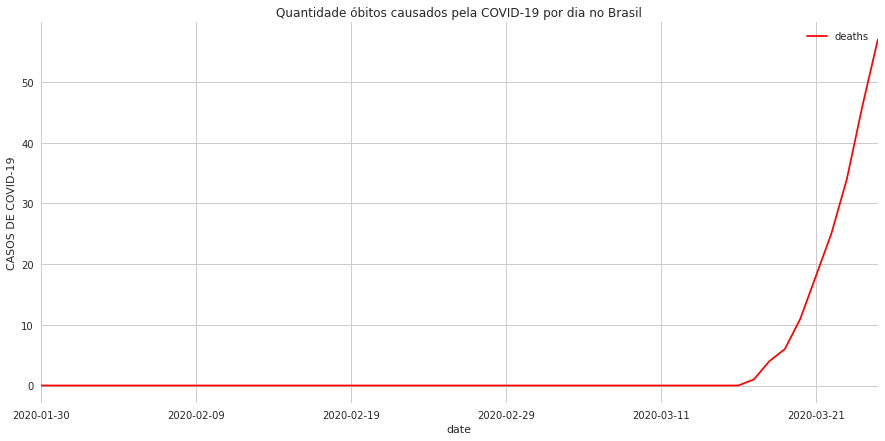

In [140]:
# Plotando gráfico com evolução de óbitos por dia no Brasil

plt.style.use('seaborn')
sns.set_style("whitegrid")

# Configurando o tamanho do gráfico
plt.rcParams['figure.figsize'] = (15,7)

# Adicionando o título 
plt.title('Quantidade óbitos causados pela COVID-19 por dia no Brasil')

# Alterando nomes dos eixos
plt.xlabel('DATA') #Verificar por que não está funcionando
plt.ylabel('CASOS DE COVID-19')

# Colocando a legenda no melhor lugar possível
plt.legend(loc='best')

# Definindo Dados
ax = plt.gca()
dfBrasilSorted.plot(kind='line', x='date', y='deaths', ax=ax, color='red')



## Mapa de calor: Quantidade de casos por estado

In [0]:
# EM DESENVOLVIMENTO (FIQUEM A VONTADE PARA APERFEIÇOAR)

from folium.plugins import HeatMap

coordenadas = []
lat = dfCordenadas['latitude'].values
long = dfCordenadas['longitude'].values
mapa = folium.Map(location=[-15.788497,-47.879873],tiles='Stamen Toner',zoom_start=4)
for la,lo in zip(lat,long):
    coordenadas.append([la,lo])
#mapa.add_child(plugins.HeatMap(coordenadas))
#mapa

## Previsao Brasil


Esse estudo usa parte do codigo dessa análise: https://github.com/lucaslattari/COVID-19

E os parâmetros utilizados nessa análise:https://docs.google.com/document/d/1ZDxOrn9ZljIzrfAnUiDjjLR28ORrvn6tHi2q3ig6WKc



In [0]:
# Funcao para plotar grafico
def plotGraph(X, y, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'infected': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', alpha=1 ,label='Confirmed Cases')
    df.set_index('dates')['infected'].plot(legend=True, grid=True, alpha=0.5,label='Predicted Cases')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [0]:
#Trabalhando os Dados
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

confirmedCasesDf = dfMundo.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

#Separando Brasil
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
#Removendo Total de casos
dates = list(confirmedCasesByDayBrazilDf)[:-1]
infected = confirmedCasesByDayBrazilDf.iloc[0,:-1]

dfForPlot = pd.DataFrame(
    {'date': dates, 'infected': infected})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail(10)


,date,infected
3/15/2020,2020-03-15,162
3/16/2020,2020-03-16,200
3/17/2020,2020-03-17,321
3/18/2020,2020-03-18,372
3/19/2020,2020-03-19,621
3/20/2020,2020-03-20,793
3/21/2020,2020-03-21,1021
3/22/2020,2020-03-22,1546
3/23/2020,2020-03-23,1924
3/24/2020,2020-03-24,2247


Text(0, 0.5, 'Number of cases')

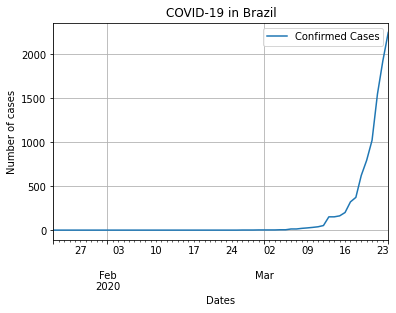

In [0]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

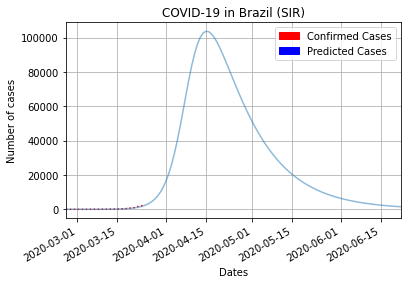

In [0]:
#Defining data
diasASimular = 90

dfForPlotDaysWithInfected = dfForPlot[dfForPlot['infected'] != 0]
#dfForPlotDaysWithInfected = dfForPlotDaysWithInfected[10:]

XRealCases = dfForPlotDaysWithInfected['date']
yRealCases = dfForPlotDaysWithInfected['infected']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['date'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['date'], predictedDays)


# Total population, N.
N = 220000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = dfForPlotDaysWithInfected['infected'][0], 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.35, 1./14

# A grid of time points (in days)
t = np.linspace(0, len(X), len(X))

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

plotGraph(X, I, XRealCases, yRealCases, "SIR")

In [0]:
print("Proximas previsões: ")

for idx, val in enumerate(X):
    if idx >= len(XRealCases):
        print(pd.to_datetime(val).strftime("%b %d"), " -> ", int(I[idx]))

Proximas previsões: 
Mar 25  ->  2560
Mar 26  ->  3371
Mar 27  ->  4430
Mar 28  ->  5807
Mar 29  ->  7588
Mar 30  ->  9874
Mar 31  ->  12780
Apr 01  ->  16432
Apr 02  ->  20949
Apr 03  ->  26430
Apr 04  ->  32926
Apr 05  ->  40405
Apr 06  ->  48730
Apr 07  ->  57634
Apr 08  ->  66737
Apr 09  ->  75583
Apr 10  ->  83706
Apr 11  ->  90699
Apr 12  ->  96274
Apr 13  ->  100287
Apr 14  ->  102732
Apr 15  ->  103713
Apr 16  ->  103403
Apr 17  ->  102013
Apr 18  ->  99756
Apr 19  ->  96836
Apr 20  ->  93430
Apr 21  ->  89691
Apr 22  ->  85741
Apr 23  ->  81682
Apr 24  ->  77590
Apr 25  ->  73525
Apr 26  ->  69531
Apr 27  ->  65643
Apr 28  ->  61881
Apr 29  ->  58264
Apr 30  ->  54800
May 01  ->  51496
May 02  ->  48353
May 03  ->  45371
May 04  ->  42548
May 05  ->  39880
May 06  ->  37362
May 07  ->  34990
May 08  ->  32756
May 09  ->  30656
May 10  ->  28682
May 11  ->  26829
May 12  ->  25090
May 13  ->  23459
May 14  ->  21930
May 15  ->  20497
May 16  ->  19156
May 17  ->  17899
May 18  